# Boxplots

## Introduction


In this notebook I will be looking at boxplots in detail including  their history, uses and alternatives to the boxplot. 


## History


John Wilder Tukey June 16, 1915 – July 26, 2000) was an American mathematician best known for development of the FFT algorithm and box plot. He introduced the box plot as part of the toolkit for Exploratory Data Analysis in 1970(EDA). It did not becom popular until EDA was published in 1977. [Ref I](https://en.wikipedia.org/wiki/Box_plot)

EDA is an approach analyzing data sets. This is often done visually. Seeing what the data can tell us, summarizing their main characteristics, often with visual methods, beyond the formal modeling or hypothesis testing task. [Ref II](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

![John Tuckey ](https://upload.wikimedia.org/wikipedia/en/e/e9/John_Tukey.jpg)

Boxplots were created to provide a succinct distributional summary that could easily be created by hand,
and support comparison across groups. The boxplot has become one of the most frequently used statistical graphics.
It is one of the few plot types invented in the 20th century that has found widespread adoption. [Ref III 40 Years of  Box Plots ](http://vita.had.co.nz/papers/boxplots.pdf)


## What is a box plot ?

![Box plot image (Ref IV) ](https://raw.githubusercontent.com/jobur123/Fundamentals-of-Data-Analytics-Project-GMIT-2018/master/Box-plot.png)

A Box Plot is the visual representation of the statistical five number summary of a given data set. A box plot provides a robust summary of the data using actual data points. It gives you a good idea of how the data is dispersed.

1. Minimum - not the minimum but the lowest datum within 1.5 IQR of Q1.
2. First Quartile - Q1 is the middle number between the median and the smallest number in the dataset.
3. Median - the middle value of the dataset
4. Third Quartile - Q3 is the middle number between the median and the largest number in the dataset.
5. Maximum - not the maximum but the highest datum within 1.5 IQR of Q3. 

Any data outside the Whiskers (The lines at the min and max point), are outliers shown as dots. The inter-quartile range is the area between Q1 and Q3. The calculation method for the max and min point can vary, so this should be stated on the chart.

[Ref V Chartio](https://chartio.com/resources/tutorials/what-is-a-box-plot/) 

## Uses of box plots

I have imported a dataset from Met Eireann to demonstrate the use of boxplots. I will be graphing monthly rainfall over 6 years 2012 to 2017 inclusive. I cleaned up this dataset and created a smaller dataset for this purpose. The python code and this dataset are in the cells below. There are multiple ways to create box plots in python. I used to pandas to create the box plots displayed below.

In [1]:
# import python packages requried for this notebook

# Pythons 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# import dataset from csv file
df = pd.read_csv('https://raw.githubusercontent.com/jobur123/Fundamentals-of-Data-Analytics-Project-GMIT-2018/master/AthenryMonthlyWeather.csv',skiprows=19, nrows=88)

# Combine date and month columns in new date column
df = df.assign(Date=pd.to_datetime(df[['year', 'month']].assign(day=1)))

In [3]:
# Checking dataset
df1 = df[['year', 'month','rain', 'Date']]
df1.loc
df1.shape
df1.describe()

# Removing 2011 and 2018 monthly rainfall data as neither year contained 12 months data.
df1 = df1.loc[df1.loc[:, 'year'] != 2011]
df1 = df1.loc[df1.loc[:, 'year'] != 2018]

# Display the dataframe used for plotting
df1

,year,month,rain,Date
5,2012,1,131.1,2012-01-01
6,2012,2,62.3,2012-02-01
7,2012,3,30.5,2012-03-01
8,2012,4,74.8,2012-04-01
9,2012,5,48.2,2012-05-01
10,2012,6,175.6,2012-06-01
11,2012,7,117.9,2012-07-01
12,2012,8,114.2,2012-08-01
13,2012,9,101.4,2012-09-01
14,2012,10,127.7,2012-10-01


Text(0.5, 1.0, 'Monthly rainfall in mm by year')

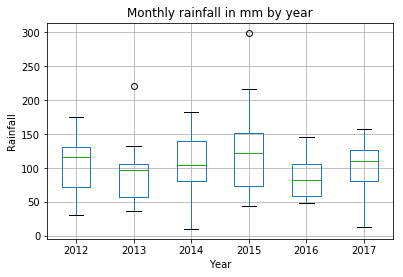

In [4]:
# Create a box plot of monthly rainfall by year
bp1 = df1.boxplot(by='year', column=['rain'])
plt.suptitle("")
bp1.set_xlabel("Year")
bp1.set_ylabel("Rainfall")
bp1.set_title("Monthly rainfall in mm by year")


Text(0.5, 1.0, 'Total rainfall in mm by month from 2012 to 2017 inclusive')

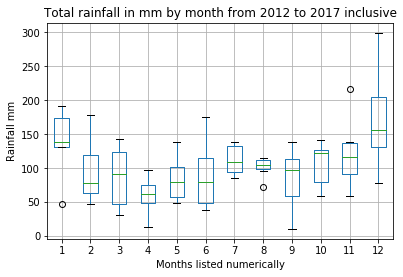

In [5]:
# Create a box plot of monthly rainfall by month 
bp2 = df1.boxplot(by='month', column=['rain'])
plt.suptitle("")
bp2.set_xlabel("Months listed numerically")
bp2.set_ylabel("Rainfall mm")
bp2.set_title("Total rainfall in mm by month from 2012 to 2017 inclusive")


Both boxplots show the monthly rainfall data. The first containing 6 box plots shows the monthly rainfall for each year across the six years. The second shows 12 plots, showing the rainfall by month over the six years. The simplicity and size of these plots, make them very useful for summarizing data in this manner. 

Alternatives I could have used would be a density chart (this would contain too many overlapping lines in this instance), a multi-bar chart (the number of bars would make this cumbersomme), or multiple histograms. While these would work, they cannot summarize the data so cleanly showing how it is dispersed in such a compact size. This and the power of computers is why the boxplot is so popular. Box-plots support comparison across groups as the data points are set. This is not so straight-forward with histograms etc as there are choices to be made with the number of bins etc.

Since the box plot was created many new variants have emerged including: the vase plot(Benjamini, 1988), where the box is replaced with a symmetrical display of estimated density; Violin plots (Hintze and Nelson, 1998) are very similar, but display the density for all data points, not just the middle half; & the bean plot Kamstra (2008). [Ref III 40 Years of  Box Plots ](http://vita.had.co.nz/papers/boxplots.pdf)


## References

I. History of the box plot - [Wiki of box plot](https://en.wikipedia.org/wiki/Box_plot)

II. Exploratory Data Analysis - [Wiki EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

III. History - [40 years of box plots](http://vita.had.co.nz/papers/boxplots.pdf)

IV. Box plot image - [Image ArcGIS Pro](https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/box-plot.htm)

V. What is a box plot - [Chartio ](https://chartio.com/resources/tutorials/what-is-a-box-plot/)


## Acknowledgements

1. Box plot documentation - [Matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
2. Box plot demos - [Matplotlib boxplot demos](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py)
3. Box plot documentation - [Pandas.boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html)
4. GMIT data analytics coursework,lectures, forum and slack channel. 
